# Some useful functions

In [1]:
import time
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import svm
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D, MaxPool2D
from keras.layers import Activation, Dense, Flatten, Dropout
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
def plot_history(history):
    """
    This function plot training history of a model 
    """
    plt.figure(1) 
    plt.subplot(211)  
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])  
    plt.title('model accuracy')  
    plt.ylabel('accuracy')
    plt.xlabel('epoch')  
    plt.legend(['train', 'test'], loc='upper left')  
    plt.ylim(0.0, 1.1)
     # summarize history for loss  

    plt.subplot(212)  
    plt.plot(history.history['loss'])  
    plt.plot(history.history['val_loss'])  
    plt.title('model loss')  
    plt.ylabel('loss')  
    plt.xlabel('epoch')  
    plt.legend(['train', 'test'], loc='upper left')  
    plt.ylim(0.0, 1.1)
     
    plt.show()


def find_outliers(data,outliers_fraction,n_neighbors):
    """
    This function finds and plots outliers using the Local Outlier Factor method  
    """
    # Example settings
    n_samples = data.shape[0]
    n_outliers = int(outliers_fraction * n_samples)
    n_inliers = n_samples - n_outliers

    # define outlier/anomaly detection methods to be compared
    anomaly_algorithms = [("Local Outlier Factor", LocalOutlierFactor(
            n_neighbors=n_neighbors, contamination=outliers_fraction))]

    # Define datasets
    blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2)
    datasets = [data]

    # # Compare given classifiers under given settings
    xx, yy = np.meshgrid(np.linspace(-10000, 40000, 150),
                         np.linspace(-10000, 40000, 150))

#     plt.figure(figsize=(5,5))
    plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                        hspace=.01)

    plot_num = 1
    rng = np.random.RandomState(42)

    for i_dataset, X_ in enumerate(datasets):
        for name, algorithm in anomaly_algorithms:
            t0 = time.time()
            algorithm.fit(X_)
            t1 = time.time()
            plt.subplot(len(datasets), len(anomaly_algorithms), plot_num)
            if i_dataset == 0:
                plt.title(name)

            # fit the data and tag outliers
            if name == "Local Outlier Factor":
                y_pred = algorithm.fit_predict(X_)
            else:
                y_pred = algorithm.fit(X).predict(X_)

            # plot the levels lines and the points
            if name != "Local Outlier Factor":  # LOF does not implement predict
                Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
#             print(y_pred)
            colors = np.array(['b', 'y'])
            plt.scatter(X_[:, 0], X_[:, 1],alpha=0.5, color=colors[(y_pred + 1) // 2])
            plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                     transform=plt.gca().transAxes, size=15,
                     horizontalalignment='right')
            plot_num += 1

    plt.show()
    return y_pred


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


def get_model():
    """
    This function creates and compile a Sequential model used as classifier
    """
    model = Sequential()
    model.add(Conv2D(filters = 32, kernel_size = 2,input_shape=(SIZE,SIZE,1),padding='same'))
    model.add(Conv2D(filters = 32,kernel_size = 2,activation= 'relu',padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=2))

    model.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same'))
    model.add(MaxPool2D(pool_size=2))

    model.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same'))
    model.add(MaxPool2D(pool_size=2))

    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    model.add(Dense(8,activation = 'softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    print('Compiled!')
    return model

np.set_printoptions(precision=2)

Using TensorFlow backend.


# Loading original dataset
 I used load_files from sklearn.datasets package function to load the original dataset


In [2]:
from sklearn.datasets import load_files
import numpy as np

data_dir = '../input/xnaturev2/XNature/'

# loading file names and their respective target labels into numpy array! 
def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels
data, labels,target_labels = load_dataset(data_dir)
print('Loading complete!')
print('Data set size : ' , data.shape[0])

Loading complete!
Data set size :  2984


# 1. Prepare data

here I load the images and convert into gray images, then I performed a PCA in order to visualiza data to them find outliers, if exist.

In [3]:
#again prepare data load files and labels
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from skimage.color import rgb2gray
SIZE=100
def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(rgb2gray(img_to_array(load_img(file,target_size=(SIZE, SIZE)))))
        
    return images_as_array

X = np.array(convert_image_to_array(data))
X=X.reshape(X.shape[0],X.shape[1],X.shape[2],1) #
print('Original set shape : ',X.shape)


print('1st original image shape ',X[0].shape)
no_of_classes = len(np.unique(labels))
y = np_utils.to_categorical(labels,no_of_classes)



Original set shape :  (2984, 100, 100, 1)
1st original image shape  (100, 100, 1)


> ## Outliers remotion

A simple visualization can help identify outliers, in this case I used PCA

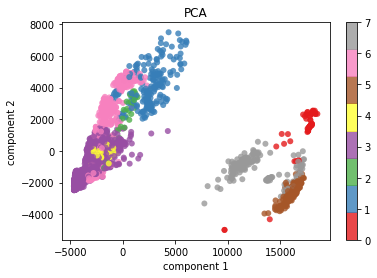

In [4]:
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.decomposition import PCA
pca = PCA(2)  # 100*100*3 from 64 to 2 dimensions
projected = pca.fit_transform(X.reshape(X.shape[0],SIZE*SIZE*1))
scatter=plt.scatter(projected[:, 0], projected[:, 1],
            c=labels,cmap=plt.cm.get_cmap('Set1', 8), edgecolor='none', alpha=0.8)
plt.title("PCA")
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
# plt.legend(handles=scatter.legend_elements()[0], labels=list(target_labels),loc='upper right', bbox_to_anchor=(1.5, 1))

plt.show()


some points look like outliers so I will use LocalOutlierFactor to remove some posible outliers

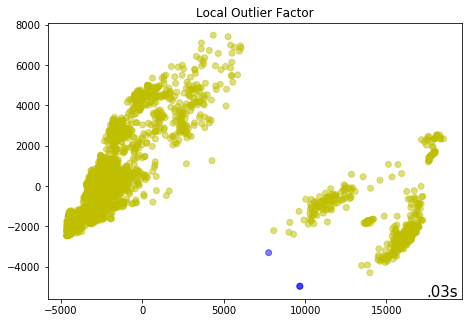

Fruits


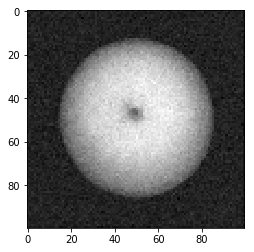

Wood


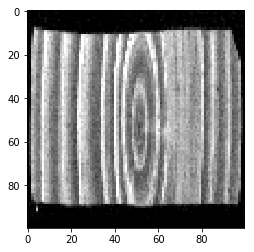

Fruits


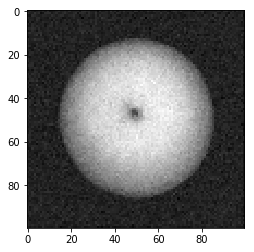

In [5]:
#plot outliers and show corresponding iamges
y_pred=find_outliers(projected,0.001,27)
outliers=X[y_pred==-1]
lbs=y[y_pred==-1]
for ol,lb in zip(outliers,lbs):    
    print(target_labels[np.argmax([lb])])
    plt.imshow(ol.reshape(SIZE,SIZE),cmap='gray')
    plt.show()
       

### Remove outliers

In [6]:
X=X[y_pred!=-1]
y=y[y_pred!=-1]
print(X.shape)
print(y.shape)

(2981, 100, 100, 1)
(2981, 8)


Split data into training and testing datasets

In [7]:
#split data into training and test sets
from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33,shuffle=True)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33,shuffle=True, random_state=42)
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
print('Training set shape : ',x_train.shape)
print('Testing set shape : ',x_test.shape)

Training set shape :  (1997, 100, 100, 1)
Testing set shape :  (984, 100, 100, 1)


## Imbalance analysis
A simple bar chart show how the classes are imbalanced. Class knife has many more occurrences than the other classes

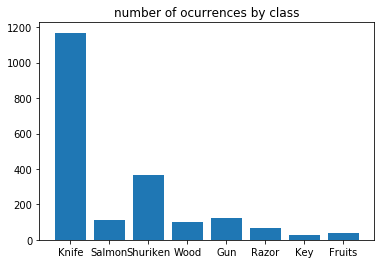

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline
from collections import Counter
import pandas as pd
D =Counter(np.argmax(y_train,axis=1))
plt.title("number of ocurrences by class")
plt.bar(range(len(D)), D.values(), align='center')
plt.xticks(range(len(D)), target_labels[list(D.keys())])
plt.show()

In this case the class Knife has much more data than the others and it could cause overfitting and misinterpretation of results.


In order to eliminate this bias of imbalance we need to balance the dataset. We can use different balancing methods both, using manual augmentation or using some functions like balanced_batch_generator.  Among them, the simplest that would be the undersampling of n-1 classes for the number of elements in the class with less elements or oversampling of the n-1 classes for the quantity of elements of the class with more elements. 

Another known easy method to solve the imbalance problem is to adding weights to classes during the training as following:

In [9]:
from sklearn.utils import class_weight

y_numbers=y_train.argmax(axis=1)
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_numbers),
                                                 y_numbers)
class_weights = dict(enumerate(class_weights))
class_weights

{0: 6.934027777777778,
 1: 2.06301652892562,
 2: 9.24537037037037,
 3: 0.2135372112917023,
 4: 3.8403846153846155,
 5: 2.269318181818182,
 6: 0.682035519125683,
 7: 2.4235436893203883}

To help us with the imbalance task scikit-learn has a function that helps us calculate the weight of each class

# 2. Train and package model

Therefore, we only need to adjust some parameters and pass the weights of the classes during the training of our model

In [10]:
#train the model

from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras import backend as K

model = get_model()
model.summary()

no_of_classes = len(np.unique(labels))
batch_size = 32
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
checkpointer = ModelCheckpoint(filepath = 'cnn_xnatureV2_balanced_weight.hdf5', verbose = 1, save_best_only = True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=3, verbose=1, min_lr=0.00005)

history = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=30,
        validation_split=0.2,
        class_weight=class_weights,
        callbacks = [es,checkpointer,reduce_lr],
        verbose=1, shuffle=True)

Compiled!
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 32)      160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 32)      4128      
_________________________________________________________________
activation_1 (Activation)    (None, 100, 100, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 25, 

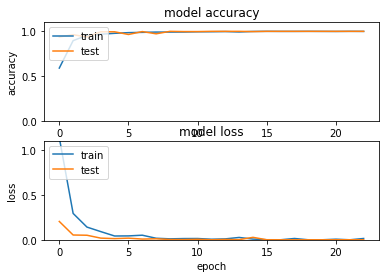

In [11]:
plot_history(history)

# 3. Testing model

In [12]:
# load the weights that yielded the best validation accuracy
# model.load_weights('cnn_xnatureV2_balanced_weight.hdf5')
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])



 Test accuracy: 1.0


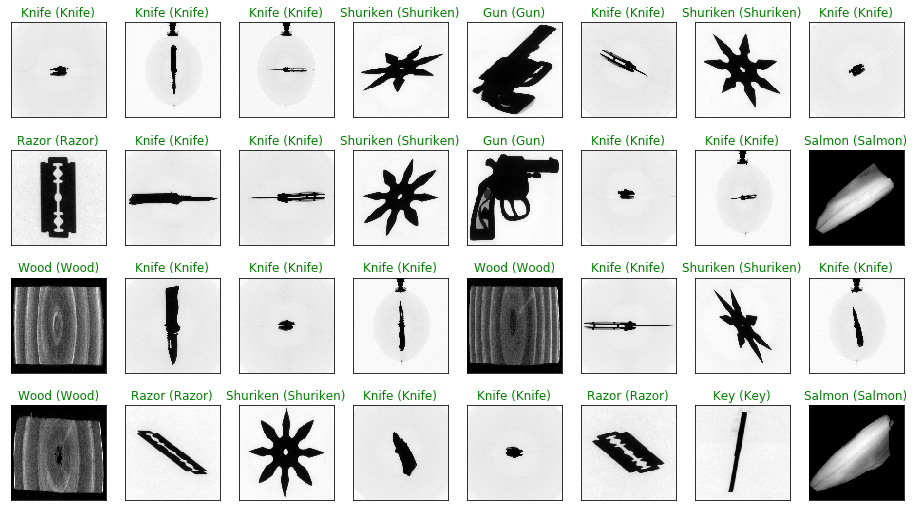

In [13]:
# plotting some prefictions
y_pred = model.predict(x_test)
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]),cmap='gray')
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

Confusion matrix, without normalization
Normalized confusion matrix


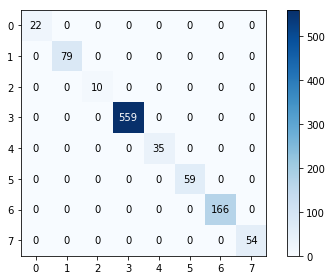

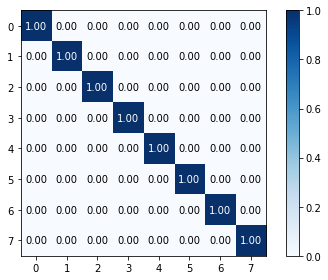

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        79
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00       559
           4       1.00      1.00      1.00        35
           5       1.00      1.00      1.00        59
           6       1.00      1.00      1.00       166
           7       1.00      1.00      1.00        54

    accuracy                           1.00       984
   macro avg       1.00      1.00      1.00       984
weighted avg       1.00      1.00      1.00       984



In [14]:

plot_confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), classes=target_labels,
                      title='Confusion matrix, without normalization')

# # Plot normalized confusion matrix
plot_confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), classes=target_labels, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

In [15]:
#show classification errors
ei=y_test.argmax(axis=1)!=y_pred.argmax(axis=1)
im_err=x_test[ei]
act=y_test[ei]
pre=y_pred[ei]
for er,a,p in zip(im_err,act,pre):
    plt.title(target_labels[np.argmax(p)]+"/"+target_labels[np.argmax(a)])
    plt.imshow(er.reshape(SIZE,SIZE),cmap='gray')
    plt.show()

# 4. Model Validation
I used KFold with K= 10 and 10 epochs to validate the model, for each split I recompute the class weight. In order to evaluate the validation the confusion matrix classification is been presented. 

The final result was ... 

<span style="color:blue">Accuracy mean: *99.698%* std: 0.381</span>

TRAIN: 2682 TEST: 299
<module 'sklearn.utils.class_weight' from '/opt/conda/lib/python3.6/site-packages/sklearn/utils/class_weight.py'>
Compiled!
Train on 2145 samples, validate on 537 samples
Epoch 1/10
2145/2145 [==============================] - 37s 17ms/step - loss: 0.9495 - accuracy: 0.7030 - val_loss: 0.2099 - val_accuracy: 0.9423
Epoch 2/10
2145/2145 [==============================] - 37s 17ms/step - loss: 0.1669 - accuracy: 0.9217 - val_loss: 0.0913 - val_accuracy: 0.9832
Epoch 3/10
2145/2145 [==============================] - 37s 17ms/step - loss: 0.1188 - accuracy: 0.9557 - val_loss: 0.1119 - val_accuracy: 0.9870
Epoch 4/10
2145/2145 [==============================] - 38s 18ms/step - loss: 0.0491 - accuracy: 0.9767 - val_loss: 0.1735 - val_accuracy: 0.9926
Epoch 5/10
2145/2145 [==============================] - 37s 17ms/step - loss: 0.0369 - accuracy: 0.9814 - val_loss: 0.0530 - val_accuracy: 0.9963
Epoch 6/10
2145/2145 [==============================] - 37s 17ms/step - loss:

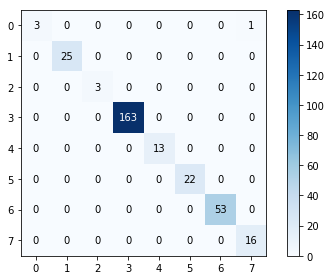

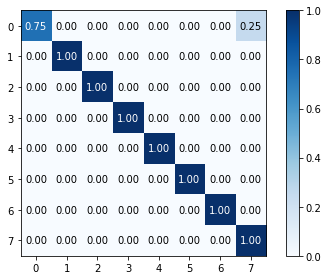

accuracy: 99.67%
TRAIN: 2683 TEST: 298
<module 'sklearn.utils.class_weight' from '/opt/conda/lib/python3.6/site-packages/sklearn/utils/class_weight.py'>
Compiled!
Train on 2146 samples, validate on 537 samples
Epoch 1/10
2146/2146 [==============================] - 38s 18ms/step - loss: 0.9283 - accuracy: 0.6538 - val_loss: 0.3931 - val_accuracy: 0.6629
Epoch 2/10
2146/2146 [==============================] - 38s 18ms/step - loss: 0.2193 - accuracy: 0.9240 - val_loss: 0.0749 - val_accuracy: 0.9758
Epoch 3/10
2146/2146 [==============================] - 37s 17ms/step - loss: 0.0882 - accuracy: 0.9651 - val_loss: 0.0156 - val_accuracy: 0.9907
Epoch 4/10
2146/2146 [==============================] - 38s 18ms/step - loss: 0.0554 - accuracy: 0.9767 - val_loss: 0.2546 - val_accuracy: 0.9963
Epoch 5/10
2146/2146 [==============================] - 37s 17ms/step - loss: 0.0369 - accuracy: 0.9897 - val_loss: 0.0244 - val_accuracy: 0.9981
Epoch 6/10
2146/2146 [==============================] - 37s 

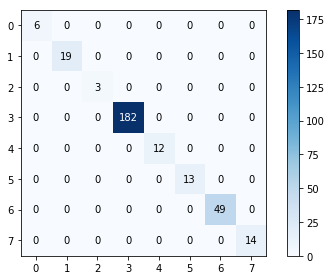

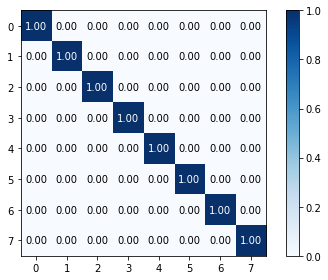

accuracy: 100.00%
TRAIN: 2683 TEST: 298
<module 'sklearn.utils.class_weight' from '/opt/conda/lib/python3.6/site-packages/sklearn/utils/class_weight.py'>
Compiled!
Train on 2146 samples, validate on 537 samples
Epoch 1/10
2146/2146 [==============================] - 38s 18ms/step - loss: 1.0120 - accuracy: 0.7218 - val_loss: 0.2122 - val_accuracy: 0.9404
Epoch 2/10
2146/2146 [==============================] - 37s 17ms/step - loss: 0.1858 - accuracy: 0.9362 - val_loss: 0.0482 - val_accuracy: 0.9721
Epoch 3/10
2146/2146 [==============================] - 37s 17ms/step - loss: 0.1128 - accuracy: 0.9595 - val_loss: 0.0441 - val_accuracy: 0.9777
Epoch 4/10
2146/2146 [==============================] - 37s 17ms/step - loss: 0.0639 - accuracy: 0.9790 - val_loss: 0.0522 - val_accuracy: 0.9981
Epoch 5/10
2146/2146 [==============================] - 37s 17ms/step - loss: 0.0464 - accuracy: 0.9809 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 6/10
2146/2146 [==============================] - 37s

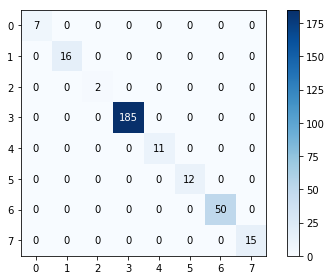

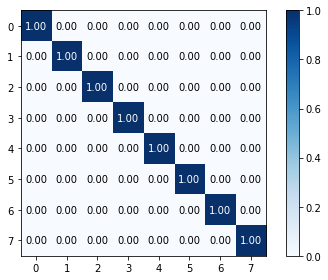

accuracy: 100.00%
TRAIN: 2683 TEST: 298
<module 'sklearn.utils.class_weight' from '/opt/conda/lib/python3.6/site-packages/sklearn/utils/class_weight.py'>
Compiled!
Train on 2146 samples, validate on 537 samples
Epoch 1/10
2146/2146 [==============================] - 38s 18ms/step - loss: 0.8707 - accuracy: 0.7106 - val_loss: 0.1220 - val_accuracy: 0.9832
Epoch 2/10
2146/2146 [==============================] - 37s 17ms/step - loss: 0.1075 - accuracy: 0.9534 - val_loss: 0.0919 - val_accuracy: 0.9926
Epoch 3/10
2146/2146 [==============================] - 38s 18ms/step - loss: 0.0573 - accuracy: 0.9748 - val_loss: 0.0273 - val_accuracy: 0.9944
Epoch 4/10
2146/2146 [==============================] - 38s 18ms/step - loss: 0.0341 - accuracy: 0.9870 - val_loss: 0.0470 - val_accuracy: 0.9926
Epoch 5/10
2146/2146 [==============================] - 38s 18ms/step - loss: 0.0233 - accuracy: 0.9916 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 6/10
2146/2146 [==============================] - 39s

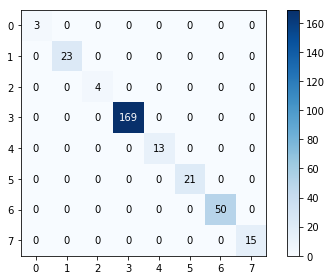

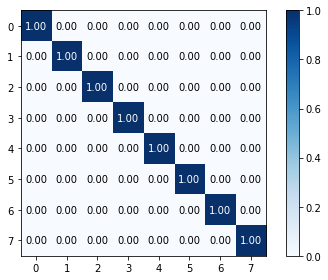

accuracy: 100.00%
TRAIN: 2683 TEST: 298
<module 'sklearn.utils.class_weight' from '/opt/conda/lib/python3.6/site-packages/sklearn/utils/class_weight.py'>
Compiled!
Train on 2146 samples, validate on 537 samples
Epoch 1/10
2146/2146 [==============================] - 38s 18ms/step - loss: 0.9603 - accuracy: 0.6985 - val_loss: 0.2748 - val_accuracy: 0.9274
Epoch 2/10
2146/2146 [==============================] - 38s 18ms/step - loss: 0.1775 - accuracy: 0.9264 - val_loss: 0.0983 - val_accuracy: 0.9814
Epoch 3/10
2146/2146 [==============================] - 38s 18ms/step - loss: 0.0687 - accuracy: 0.9674 - val_loss: 0.0389 - val_accuracy: 0.9944
Epoch 4/10
2146/2146 [==============================] - 38s 18ms/step - loss: 0.0517 - accuracy: 0.9748 - val_loss: 0.1024 - val_accuracy: 0.9851
Epoch 5/10
2146/2146 [==============================] - 38s 18ms/step - loss: 0.0340 - accuracy: 0.9851 - val_loss: 0.0439 - val_accuracy: 0.9963
Epoch 6/10
2146/2146 [==============================] - 38s

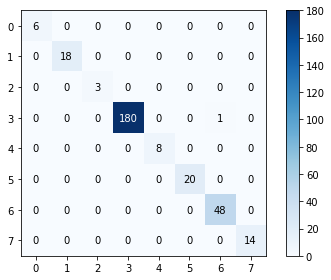

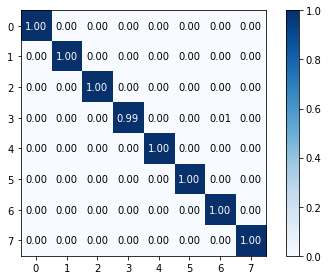

accuracy: 99.66%
TRAIN: 2683 TEST: 298
<module 'sklearn.utils.class_weight' from '/opt/conda/lib/python3.6/site-packages/sklearn/utils/class_weight.py'>
Compiled!
Train on 2146 samples, validate on 537 samples
Epoch 1/10
2146/2146 [==============================] - 39s 18ms/step - loss: 0.9704 - accuracy: 0.6608 - val_loss: 0.1202 - val_accuracy: 0.9628
Epoch 2/10
2146/2146 [==============================] - 39s 18ms/step - loss: 0.1807 - accuracy: 0.9287 - val_loss: 0.1316 - val_accuracy: 0.9814
Epoch 3/10
2146/2146 [==============================] - 38s 18ms/step - loss: 0.1056 - accuracy: 0.9739 - val_loss: 0.0968 - val_accuracy: 0.9851
Epoch 4/10
2146/2146 [==============================] - 38s 18ms/step - loss: 0.0461 - accuracy: 0.9786 - val_loss: 0.1346 - val_accuracy: 0.9963
Epoch 5/10
2146/2146 [==============================] - 38s 18ms/step - loss: 0.0505 - accuracy: 0.9874 - val_loss: 0.0629 - val_accuracy: 0.9981
Epoch 6/10
2146/2146 [==============================] - 38s 

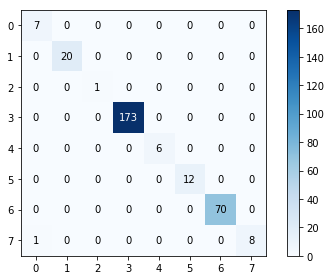

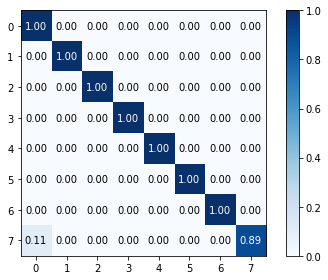

accuracy: 99.66%
TRAIN: 2683 TEST: 298
<module 'sklearn.utils.class_weight' from '/opt/conda/lib/python3.6/site-packages/sklearn/utils/class_weight.py'>
Compiled!
Train on 2146 samples, validate on 537 samples
Epoch 1/10
2146/2146 [==============================] - 38s 18ms/step - loss: 0.9289 - accuracy: 0.6701 - val_loss: 0.1884 - val_accuracy: 0.9348
Epoch 2/10
2146/2146 [==============================] - 38s 18ms/step - loss: 0.2569 - accuracy: 0.9096 - val_loss: 0.0447 - val_accuracy: 0.9851
Epoch 3/10
2146/2146 [==============================] - 38s 18ms/step - loss: 0.0809 - accuracy: 0.9599 - val_loss: 0.0115 - val_accuracy: 0.9944
Epoch 4/10
2146/2146 [==============================] - 38s 18ms/step - loss: 0.0627 - accuracy: 0.9772 - val_loss: 0.0544 - val_accuracy: 0.9721
Epoch 5/10
2146/2146 [==============================] - 38s 18ms/step - loss: 0.0456 - accuracy: 0.9846 - val_loss: 0.0255 - val_accuracy: 0.9944
Epoch 6/10
2146/2146 [==============================] - 38s 

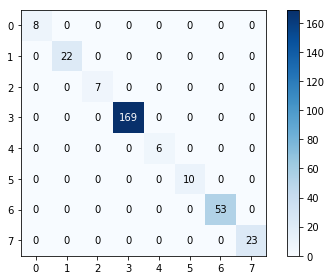

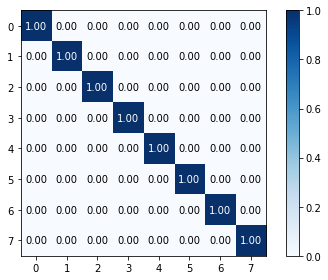

accuracy: 100.00%
TRAIN: 2683 TEST: 298
<module 'sklearn.utils.class_weight' from '/opt/conda/lib/python3.6/site-packages/sklearn/utils/class_weight.py'>
Compiled!
Train on 2146 samples, validate on 537 samples
Epoch 1/10
2146/2146 [==============================] - 39s 18ms/step - loss: 0.8871 - accuracy: 0.6771 - val_loss: 0.1141 - val_accuracy: 0.9683
Epoch 2/10
2146/2146 [==============================] - 38s 18ms/step - loss: 0.1978 - accuracy: 0.9236 - val_loss: 0.0660 - val_accuracy: 0.9683
Epoch 3/10
2146/2146 [==============================] - 38s 18ms/step - loss: 0.0945 - accuracy: 0.9576 - val_loss: 0.1402 - val_accuracy: 0.9739
Epoch 4/10
2146/2146 [==============================] - 38s 17ms/step - loss: 0.0515 - accuracy: 0.9804 - val_loss: 0.0908 - val_accuracy: 0.9888
Epoch 5/10
2146/2146 [==============================] - 38s 18ms/step - loss: 0.0496 - accuracy: 0.9870 - val_loss: 0.0430 - val_accuracy: 0.9963
Epoch 6/10
2146/2146 [==============================] - 38s

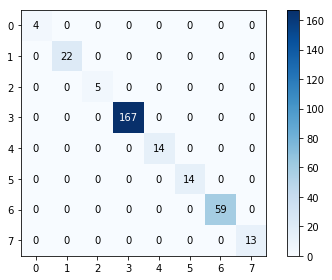

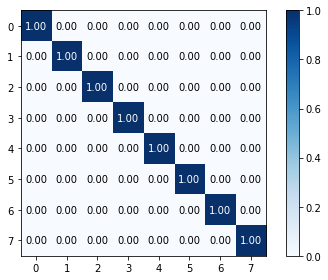

accuracy: 100.00%
TRAIN: 2683 TEST: 298
<module 'sklearn.utils.class_weight' from '/opt/conda/lib/python3.6/site-packages/sklearn/utils/class_weight.py'>
Compiled!
Train on 2146 samples, validate on 537 samples
Epoch 1/10
2146/2146 [==============================] - 38s 18ms/step - loss: 0.8785 - accuracy: 0.7004 - val_loss: 0.1363 - val_accuracy: 0.9572
Epoch 2/10
2146/2146 [==============================] - 38s 18ms/step - loss: 0.1488 - accuracy: 0.9445 - val_loss: 0.0205 - val_accuracy: 0.9870
Epoch 3/10
2146/2146 [==============================] - 39s 18ms/step - loss: 0.0509 - accuracy: 0.9772 - val_loss: 0.0416 - val_accuracy: 0.9926
Epoch 4/10
2146/2146 [==============================] - 39s 18ms/step - loss: 0.0431 - accuracy: 0.9809 - val_loss: 0.0252 - val_accuracy: 0.9944
Epoch 5/10
2146/2146 [==============================] - 38s 18ms/step - loss: 0.0278 - accuracy: 0.9897 - val_loss: 0.0281 - val_accuracy: 0.9963

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0

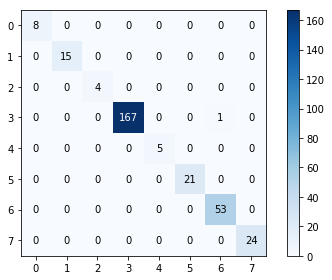

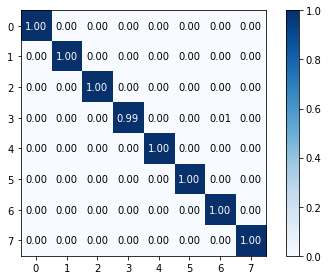

accuracy: 99.66%
TRAIN: 2683 TEST: 298
<module 'sklearn.utils.class_weight' from '/opt/conda/lib/python3.6/site-packages/sklearn/utils/class_weight.py'>
Compiled!
Train on 2146 samples, validate on 537 samples
Epoch 1/10
2146/2146 [==============================] - 39s 18ms/step - loss: 0.7457 - accuracy: 0.7008 - val_loss: 0.0755 - val_accuracy: 0.9572
Epoch 2/10
2146/2146 [==============================] - 39s 18ms/step - loss: 0.1410 - accuracy: 0.9427 - val_loss: 0.0238 - val_accuracy: 0.9851
Epoch 3/10
2146/2146 [==============================] - 38s 18ms/step - loss: 0.0366 - accuracy: 0.9776 - val_loss: 0.0937 - val_accuracy: 0.9534
Epoch 4/10
2146/2146 [==============================] - 38s 18ms/step - loss: 0.0280 - accuracy: 0.9884 - val_loss: 0.0330 - val_accuracy: 0.9963
Epoch 5/10
2146/2146 [==============================] - 38s 18ms/step - loss: 0.0085 - accuracy: 0.9939 - val_loss: 0.0490 - val_accuracy: 0.9981

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.

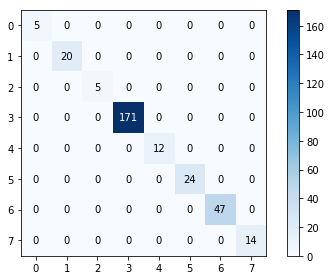

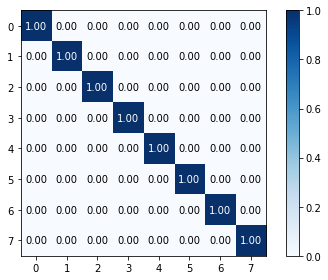

accuracy: 100.00%
99.86588478088379 0.16425721345870356


In [16]:
import numpy as np
from sklearn.model_selection import KFold
from keras import backend as K
from sklearn.utils import class_weight



no_of_classes = len(np.unique(labels))
batch_size = 32
kfold = KFold(n_splits=10, shuffle=True, random_state=7)
cvscores=[]

for train_index, test_index in kfold.split(X,y):
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    x_train = x_train.astype('float32')/255
    x_test = x_test.astype('float32')/255
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=3, verbose=1, min_lr=0.0001)
    y_numbers=y_train.argmax(axis=1)
    class_weights = class_weight.compute_class_weight('balanced', np.unique(y_numbers), y_numbers)
    class_weights = dict(enumerate(class_weights))
    print(class_weight)
    model=get_model()
    history = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_split=0.2,
        class_weight=class_weights,
        callbacks = [reduce_lr],
        verbose=1, shuffle=True)
    # evaluate the model
    y_pred = model.predict(x_test)
    plot_confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), classes=target_labels,
                      title='Confusion matrix, without normalization')

    # # Plot normalized confusion matrix
    plot_confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), classes=target_labels, normalize=True,
                          title='Normalized confusion matrix')

    plt.show()
    scores = model.evaluate(x_test, y_test, verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print(np.mean(cvscores), np.std(cvscores))